In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline 
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore

In [314]:
cloths_df= pd.read_csv('Dataset_m_top_final.csv')

In [315]:
cloths_df.columns

Index(['ImgID', 'BodySize', 'Complexion', 'Occasion', 'DressColor',
       'DressDesign', 'Matching'],
      dtype='object')

In [316]:
cloths_df.shape

(355, 7)

In [317]:
cloths_df.head(10)

,ImgID,BodySize,Complexion,Occasion,DressColor,DressDesign,Matching
0,photo-1492447166138-50c3889fccb1,L,Very Fair,Casual,Black&White,Cuban Collar Shirt,Y
1,Img_4,XL,Fair,Casual,Blue&White,Linen Shirt,N
2,image_51,M,Medium,Casual,LightBlue,Overshirt,N
3,image_52,M,Very Fair,Casual,Muddy Brown,Linen Shirt,Y
4,image_53,S,Fair,Wedding,White&Pink,Overshirt,Y
5,image_54,L,Olive,Wedding,Red&Cream,Linen Shirt,Y
6,image_55,M,Brown,Wedding,Yellow,Overshirt,Y
7,image_56,XL,Very Fair,Casual,Black,Linen Shirt,Y
8,image_57,L,Fair,Wedding,LightBlue,Linen Shirt,N
9,image_58,XL,Medium,Wedding,LightBlue&Golden,Linen Shirt,Y


In [318]:
cloths_df.dtypes

ImgID          object
BodySize       object
Complexion     object
Occasion       object
DressColor     object
DressDesign    object
Matching       object
dtype: object

In [319]:
cloths_df['Matching'].value_counts()

Y    229
N    126
Name: Matching, dtype: int64

In [320]:
cloths_df = cloths_df.drop('ImgID', axis=1)

In [321]:
cloths_df.shape

(355, 6)

In [322]:
cloths_df[cloths_df.isnull().any(axis=1)]

,BodySize,Complexion,Occasion,DressColor,DressDesign,Matching


In [323]:
cloths_df.head(10)

,BodySize,Complexion,Occasion,DressColor,DressDesign,Matching
0,L,Very Fair,Casual,Black&White,Cuban Collar Shirt,Y
1,XL,Fair,Casual,Blue&White,Linen Shirt,N
2,M,Medium,Casual,LightBlue,Overshirt,N
3,M,Very Fair,Casual,Muddy Brown,Linen Shirt,Y
4,S,Fair,Wedding,White&Pink,Overshirt,Y
5,L,Olive,Wedding,Red&Cream,Linen Shirt,Y
6,M,Brown,Wedding,Yellow,Overshirt,Y
7,XL,Very Fair,Casual,Black,Linen Shirt,Y
8,L,Fair,Wedding,LightBlue,Linen Shirt,N
9,XL,Medium,Wedding,LightBlue&Golden,Linen Shirt,Y


In [324]:
cloths_df.count()

BodySize       355
Complexion     355
Occasion       355
DressColor     355
DressDesign    355
Matching       355
dtype: int64

In [325]:
cloths_df.describe().transpose()

,count,unique,top,freq
BodySize,355,6,XL,154
Complexion,355,6,Fair,94
Occasion,355,8,Casual,141
DressColor,355,75,Black,45
DressDesign,355,27,Linen Shirt,69
Matching,355,2,Y,229


In [326]:
cloths_df['BodySize'] = cloths_df.BodySize.astype('category')
#cloths_df['Gender'] = cloths_df.Gender.astype('category')
cloths_df['Complexion'] = cloths_df.Complexion.astype('category')
cloths_df['Occasion'] = cloths_df.Occasion.astype('category')
cloths_df['DressColor'] = cloths_df.DressColor.astype('category')
#cloths_df['DressSize'] = cloths_df.DressSize.astype('category')
cloths_df['DressDesign'] = cloths_df.DressDesign.astype('category')
#cloths_df['DressCategory'] = cloths_df.DressCategory.astype('category')
cloths_df['Matching'] = cloths_df.Matching.astype('category')
cloths_df.dtypes

BodySize       category
Complexion     category
Occasion       category
DressColor     category
DressDesign    category
Matching       category
dtype: object

In [327]:
cloths_df.groupby(["BodySize"]).count() 

,Complexion,Occasion,DressColor,DressDesign,Matching
BodySize,,,,,
L,72,72,72,72,72
M,71,71,71,71,71
S,16,16,16,16,16
XL,154,154,154,154,154
XS,1,1,1,1,1
XXL,41,41,41,41,41


In [328]:
cloths_df.groupby(["DressDesign"]).count()

,BodySize,Complexion,Occasion,DressColor,Matching
DressDesign,,,,,
Blazer,7,7,7,7,7
Casual Shirts,17,17,17,17,17
Check shirt,13,13,13,13,13
Classic Short Sleeve Shirt,50,50,50,50,50
Cuban Collar Shirt,1,1,1,1,1
Flannel Shirt,59,59,59,59,59
Flannel Shirt&Blazer,2,2,2,2,2
Flannel Shirt&Half blazer,2,2,2,2,2
Full Jacket,2,2,2,2,2


In [329]:
cloths_df.groupby(["DressColor"]).count()

,BodySize,Complexion,Occasion,DressDesign,Matching
DressColor,,,,,
Army,2,2,2,2,2
Black,45,45,45,45,45
Black&Blue,1,1,1,1,1
Black&Golden,1,1,1,1,1
Black&Gray,1,1,1,1,1
...,...,...,...,...,...
Yellow,6,6,6,6,6
Yellow &Blue,1,1,1,1,1
Yellow&Gray,2,2,2,2,2


In [330]:
cloths_df.groupby(["Matching"]).count()

,BodySize,Complexion,Occasion,DressColor,DressDesign
Matching,,,,,
N,126,126,126,126,126
Y,229,229,229,229,229


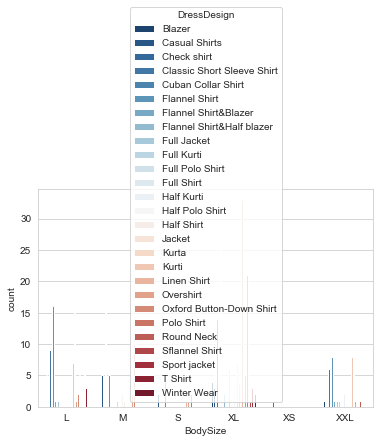

In [331]:
sns.set_style('whitegrid')
sns.countplot(x='BodySize',hue='DressDesign',data=cloths_df,palette='RdBu_r')

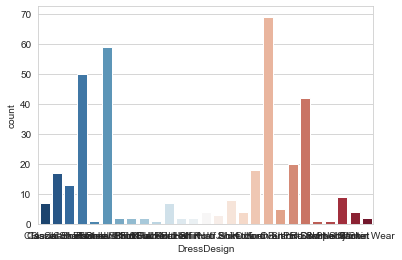

In [332]:
sns.set_style('whitegrid')
sns.countplot(x='DressDesign',data=cloths_df,palette='RdBu_r')

In [333]:
dummy_cloths_df = pd.get_dummies(cloths_df)
dummy_cloths_df

,BodySize_L,BodySize_M,BodySize_S,BodySize_XL,BodySize_XS,BodySize_XXL,Complexion_Brown,Complexion_Dark Brown,Complexion_Fair,Complexion_Medium,...,DressDesign_Overshirt,DressDesign_Oxford Button-Down Shirt,DressDesign_Polo Shirt,DressDesign_Round Neck,DressDesign_Sflannel Shirt,DressDesign_Sport jacket,DressDesign_T Shirt,DressDesign_Winter Wear,Matching_N,Matching_Y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
351,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
352,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
353,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [334]:
dummy_cloths_df.shape

(355, 124)

In [335]:
dummy_transformed = pd.get_dummies(cloths_df,drop_first= True)
dummy_transformed

,BodySize_M,BodySize_S,BodySize_XL,BodySize_XS,BodySize_XXL,Complexion_Dark Brown,Complexion_Fair,Complexion_Medium,Complexion_Olive,Complexion_Very Fair,...,DressDesign_Linen Shirt,DressDesign_Overshirt,DressDesign_Oxford Button-Down Shirt,DressDesign_Polo Shirt,DressDesign_Round Neck,DressDesign_Sflannel Shirt,DressDesign_Sport jacket,DressDesign_T Shirt,DressDesign_Winter Wear,Matching_Y
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
351,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
352,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [336]:
dummy_transformed.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BodySize_M,355.0,0.200000,0.400565,0.0,0.0,0.0,0.0,1.0
BodySize_S,355.0,0.045070,0.207751,0.0,0.0,0.0,0.0,1.0
BodySize_XL,355.0,0.433803,0.496298,0.0,0.0,0.0,1.0,1.0
BodySize_XS,355.0,0.002817,0.053074,0.0,0.0,0.0,0.0,1.0
BodySize_XXL,355.0,0.115493,0.320067,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
DressDesign_Sflannel Shirt,355.0,0.002817,0.053074,0.0,0.0,0.0,0.0,1.0
DressDesign_Sport jacket,355.0,0.025352,0.157414,0.0,0.0,0.0,0.0,1.0
DressDesign_T Shirt,355.0,0.011268,0.105698,0.0,0.0,0.0,0.0,1.0
DressDesign_Winter Wear,355.0,0.005634,0.074953,0.0,0.0,0.0,0.0,1.0


In [337]:
dummy_transformed.shape

(355, 118)

In [338]:
dummy_transformed_df = dummy_transformed.drop(labels='Matching_Y',axis=1)
dummy_transformed_df

,BodySize_M,BodySize_S,BodySize_XL,BodySize_XS,BodySize_XXL,Complexion_Dark Brown,Complexion_Fair,Complexion_Medium,Complexion_Olive,Complexion_Very Fair,...,DressDesign_Kurti,DressDesign_Linen Shirt,DressDesign_Overshirt,DressDesign_Oxford Button-Down Shirt,DressDesign_Polo Shirt,DressDesign_Round Neck,DressDesign_Sflannel Shirt,DressDesign_Sport jacket,DressDesign_T Shirt,DressDesign_Winter Wear
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
351,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
352,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [339]:
X = np.array(dummy_transformed_df)
y = np.array(dummy_transformed['Matching_Y'])

In [340]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=uint8)

In [341]:
dummy_transformed.shape


(355, 118)

In [342]:
dummy_transformed

,BodySize_M,BodySize_S,BodySize_XL,BodySize_XS,BodySize_XXL,Complexion_Dark Brown,Complexion_Fair,Complexion_Medium,Complexion_Olive,Complexion_Very Fair,...,DressDesign_Linen Shirt,DressDesign_Overshirt,DressDesign_Oxford Button-Down Shirt,DressDesign_Polo Shirt,DressDesign_Round Neck,DressDesign_Sflannel Shirt,DressDesign_Sport jacket,DressDesign_T Shirt,DressDesign_Winter Wear,Matching_Y
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
351,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
352,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [343]:
array = dummy_transformed.values
X = array[:,0:117]
Y = array[:,117]

In [344]:
Y

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=10)

In [346]:
X_train.shape

(248, 117)

In [347]:
X_test.shape

(107, 117)

In [348]:
y_test.shape

(107,)

In [349]:
print(type(X_train))
print(type(X_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [350]:
#lR
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.6728971962616822
[[13 25]
 [10 59]]


In [351]:
cloths_df_z = dummy_transformed.apply(zscore)
cloths_df_z.describe()

,BodySize_M,BodySize_S,BodySize_XL,BodySize_XS,BodySize_XXL,Complexion_Dark Brown,Complexion_Fair,Complexion_Medium,Complexion_Olive,Complexion_Very Fair,...,DressDesign_Linen Shirt,DressDesign_Overshirt,DressDesign_Oxford Button-Down Shirt,DressDesign_Polo Shirt,DressDesign_Round Neck,DressDesign_Sflannel Shirt,DressDesign_Sport jacket,DressDesign_T Shirt,DressDesign_Winter Wear,Matching_Y
count,355.000000,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,...,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02,3.550000e+02
mean,0.000000,-4.220411e-16,-4.065605e-16,1.932335e-16,1.413580e-16,2.464382e-16,7.787198e-17,-3.096115e-17,-4.159427e-17,-5.254013e-17,...,-2.336159e-16,-4.053878e-16,-5.414292e-16,-2.964765e-16,1.569167e-16,1.619596e-16,-1.462054e-16,-7.451004e-17,-1.635624e-16,8.131211e-18
std,1.001411,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,...,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00,1.001411e+00
min,-0.500000,-2.172502e-01,-8.753109e-01,-5.314940e-02,-3.613492e-01,-2.632054e-01,-6.001277e-01,-4.464575e-01,-4.189232e-01,-4.734321e-01,...,-4.911810e-01,-1.195229e-01,-2.443389e-01,-3.663131e-01,-5.314940e-02,-5.314940e-02,-1.612810e-01,-1.067521e-01,-7.527099e-02,-1.348132e+00
25%,-0.500000,-2.172502e-01,-8.753109e-01,-5.314940e-02,-3.613492e-01,-2.632054e-01,-6.001277e-01,-4.464575e-01,-4.189232e-01,-4.734321e-01,...,-4.911810e-01,-1.195229e-01,-2.443389e-01,-3.663131e-01,-5.314940e-02,-5.314940e-02,-1.612810e-01,-1.067521e-01,-7.527099e-02,-1.348132e+00
50%,-0.500000,-2.172502e-01,-8.753109e-01,-5.314940e-02,-3.613492e-01,-2.632054e-01,-6.001277e-01,-4.464575e-01,-4.189232e-01,-4.734321e-01,...,-4.911810e-01,-1.195229e-01,-2.443389e-01,-3.663131e-01,-5.314940e-02,-5.314940e-02,-1.612810e-01,-1.067521e-01,-7.527099e-02,7.417670e-01
75%,-0.500000,-2.172502e-01,1.142451e+00,-5.314940e-02,-3.613492e-01,-2.632054e-01,1.666312e+00,-4.464575e-01,-4.189232e-01,-4.734321e-01,...,-4.911810e-01,-1.195229e-01,-2.443389e-01,-3.663131e-01,-5.314940e-02,-5.314940e-02,-1.612810e-01,-1.067521e-01,-7.527099e-02,7.417670e-01
max,2.000000,4.602988e+00,1.142451e+00,1.881489e+01,2.767406e+00,3.799313e+00,1.666312e+00,2.239855e+00,2.387072e+00,2.112235e+00,...,2.035910e+00,8.366600e+00,4.092676e+00,2.729905e+00,1.881489e+01,1.881489e+01,6.200358e+00,9.367497e+00,1.328533e+01,7.417670e-01


In [352]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, 
                                                    random_state=19)

In [353]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors =15, weights ='distance')
NNH.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [354]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.704225352112676

In [355]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predicted_labels))
print(metrics.classification_report(y_test, predicted_labels))

[[ 3 19]
 [ 2 47]]
              precision    recall  f1-score   support

           0       0.60      0.14      0.22        22
           1       0.71      0.96      0.82        49

    accuracy                           0.70        71
   macro avg       0.66      0.55      0.52        71
weighted avg       0.68      0.70      0.63        71



In [358]:
cloths_labels= dummy_transformed['Matching_Y']

In [359]:
#SVM
from sklearn import svm
classifier_svm = svm.SVC()

In [360]:
X,y = np.array(dummy_transformed_df)[:, 0:117],np.array(cloths_labels
                                                       )

In [388]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, 
                                                    random_state=19)

In [389]:
classifier_svm.fit(X_train, y_train)

SVC()

In [390]:
classifier_svm.score(X_test, y_test)

0.6542056074766355